In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as train_test_split
import sklearn.linear_model as lm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv('/content/fraudTrain.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0


In [4]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
15588,15588,2019-01-10 00:19:11,4836998673805450,fraud_Rau and Sons,grocery_pos,209.38,Susan,Hardy,F,516 Brown Parks,...,46.0062,-86.2555,6469,Trade mark attorney,1979-04-12,87dc8e62d8b279247210d790461e4ec7,1326154751,46.561589,-85.326704,0.0
15589,15589,2019-01-10 00:20:34,6538891242532018,fraud_McGlynn-Jaskolski,misc_pos,28.14,Jodi,Rodriguez,F,5796 Lee Coves Apt. 286,...,36.0244,-90.9288,7155,"Engineer, control and instrumentation",1977-03-23,8472275424c4eb650f1ecc6ea2160ff0,1326154834,35.116052,-90.268677,0.0
15590,15590,2019-01-10 00:21:08,6011603272871604,fraud_Torp-Labadie,gas_transport,37.12,Robert,Holland,M,431 Tracy Expressway,...,33.1410,-84.1759,4138,Field seismologist,1969-05-16,b3a586accf43851d0ce0e65b5abf221e,1326154868,34.112678,-83.936772,0.0
15591,15591,2019-01-10 00:21:25,4210078554961359092,fraud_Stracke-Lemke,grocery_pos,144.65,Valerie,Clark,F,7402 West Ranch,...,43.9210,-122.7806,1420,Systems analyst,1965-11-11,da01c21ec74d92fcc8c2a28ff7424c8c,1326154885,44.242978,-122.612829,0.0
15592,15592,2019-01-10 00:22:39,6011329966782895,"fraud_Johnson, Runolfsdottir and Mayer",misc_net,4.90,Lauren,Butler,F,030 Seth Divide Suite 355,...,36.0557,-96.0602,413574,"Teacher, special educational needs",1971-09-01,2193637f20ab9d66ee177127475a36ab,1326154959,35.880016,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15593 entries, 0 to 15592
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15593 non-null  int64  
 1   trans_date_trans_time  15593 non-null  object 
 2   cc_num                 15593 non-null  int64  
 3   merchant               15593 non-null  object 
 4   category               15593 non-null  object 
 5   amt                    15593 non-null  float64
 6   first                  15593 non-null  object 
 7   last                   15593 non-null  object 
 8   gender                 15593 non-null  object 
 9   street                 15593 non-null  object 
 10  city                   15593 non-null  object 
 11  state                  15593 non-null  object 
 12  zip                    15593 non-null  int64  
 13  lat                    15593 non-null  float64
 14  long                   15593 non-null  float64
 15  ci

In [6]:
df.shape

(15593, 23)

In [7]:
df.size

358639

In [8]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               1
is_fraud                 1
dtype: int64

In [11]:
df["dob"] = pd.to_datetime(df["dob"])
today = pd.Timestamp('today')
df['age'] = today.year - df['dob'].dt.year
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0.0,36
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0.0,46
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.0,62
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.0,57
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0.0,38


In [13]:
df.drop(columns=[ 'trans_num','merch_lat','merch_long','trans_date_trans_time','dob'],inplace=True)

In [14]:
print("Normal Transactions count(%) :",(df['is_fraud'].value_counts()[0]/df.shape[0])*100,'%')
print("Fraud Transactions count(%) :",(df['is_fraud'].value_counts()[1]/df.shape[0])*100,'%')

Normal Transactions count(%) : 99.35227345603796 %
Fraud Transactions count(%) : 0.6413134098634002 %


In [15]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,is_fraud,age
count,15593.000000,1.559300e+04,15593.000000,15593.000000,15593.000000,15593.000000,1.559300e+04,1.559300e+04,15592.000000,15593.000000
mean,7796.000000,4.227322e+17,70.287882,49063.363496,38.537959,-90.429812,9.211852e+04,1.325778e+09,0.006414,50.990573
std,4501.455709,1.316358e+18,126.759764,27027.725226,5.164709,14.225426,3.075263e+05,2.268460e+05,0.079830,17.453489
min,0.000000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,0.000000,19.000000
25%,3898.000000,1.800462e+14,9.610000,26041.000000,34.690200,-96.962300,7.430000e+02,1.325582e+09,0.000000,37.000000
50%,7796.000000,3.520550e+15,47.960000,48206.000000,39.342600,-87.591700,2.471000e+03,1.325814e+09,0.000000,49.000000
75%,11694.000000,4.642255e+15,83.300000,72059.000000,41.811400,-80.158000,2.112500e+04,1.325968e+09,0.000000,62.000000
max,15592.000000,4.992346e+18,5444.240000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326155e+09,1.000000,100.000000


In [18]:
def unique(columns):
  for col in columns:
    print('Column Name :',col)
    print('Unique Values :',int(df[f'{col}'].nunique()))
    print('--------------------------------------------------------------------')

In [19]:
unique(list(df.columns))

Column Name : Unnamed: 0
Unique Values : 15593
--------------------------------------------------------------------
Column Name : cc_num
Unique Values : 908
--------------------------------------------------------------------
Column Name : merchant
Unique Values : 693
--------------------------------------------------------------------
Column Name : category
Unique Values : 14
--------------------------------------------------------------------
Column Name : amt
Unique Values : 8965
--------------------------------------------------------------------
Column Name : first
Unique Values : 337
--------------------------------------------------------------------
Column Name : last
Unique Values : 465
--------------------------------------------------------------------
Column Name : gender
Unique Values : 2
--------------------------------------------------------------------
Column Name : street
Unique Values : 908
--------------------------------------------------------------------
Column N

In [20]:
cat_var = ['merchant','category','first','last','gender','street','city','state','zip','job']

In [22]:
encoder = LabelEncoder()
for col in cat_var:
  df[f'{col}'] = encoder.fit_transform(df[f'{col}'])


In [23]:
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,is_fraud,age
0,0,2703186189652095,514,8,4.97,152,18,0,526,493,26,241,36.0788,-81.1781,3495,356,1325376018,0.0,36
1,1,630423337322,241,4,107.23,295,154,0,408,567,46,893,48.8878,-118.2105,149,411,1325376044,0.0,46
2,2,38859492057661,390,0,220.11,105,372,1,559,439,12,795,42.1808,-112.2620,4154,294,1325376051,0.0,62
3,3,3534093764340240,360,2,45.00,153,447,1,859,81,25,567,46.2306,-112.1138,1939,315,1325376076,0.0,57
4,4,375534208663984,297,9,41.96,321,146,1,393,203,44,211,38.4207,-79.4629,99,110,1325376186,0.0,38


In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df['is_fraud'] = imputer.fit_transform(df[['is_fraud']])

In [33]:
x = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [34]:
smote = SMOTE(
    sampling_strategy='auto',
    random_state = 0,
    k_neighbors = 3
)
x_res,y_res = smote.fit_resample(x,y)

In [35]:
data = pd.concat([x_res,y_res],axis=1)
data.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,age,is_fraud
0,0,2703186189652095,514,8,4.97,152,18,0,526,493,26,241,36.0788,-81.1781,3495,356,1325376018,36,0.0
1,1,630423337322,241,4,107.23,295,154,0,408,567,46,893,48.8878,-118.2105,149,411,1325376044,46,0.0
2,2,38859492057661,390,0,220.11,105,372,1,559,439,12,795,42.1808,-112.2620,4154,294,1325376051,62,0.0
3,3,3534093764340240,360,2,45.00,153,447,1,859,81,25,567,46.2306,-112.1138,1939,315,1325376076,57,0.0
4,4,375534208663984,297,9,41.96,321,146,1,393,203,44,211,38.4207,-79.4629,99,110,1325376186,38,0.0


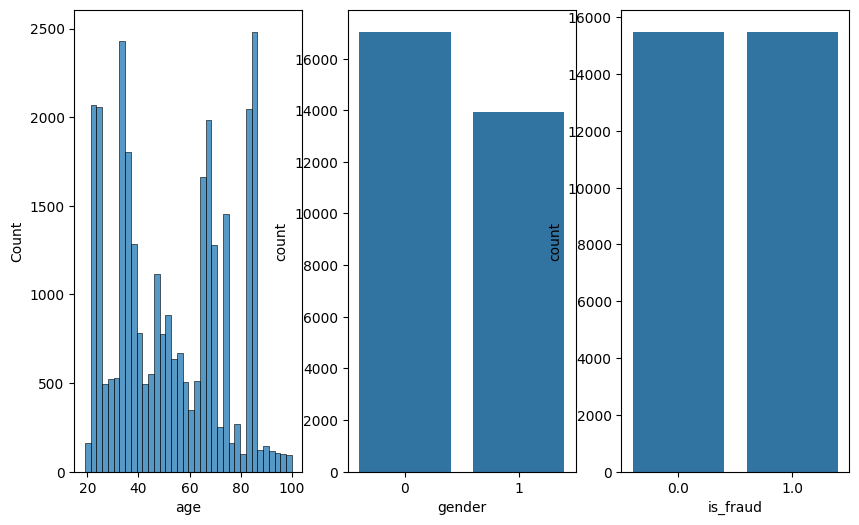

In [39]:
fig, ax = plt.subplots(1,3,figsize=(10,6))
sns.histplot(data,x='age',ax=ax[0])
sns.countplot(data,x='gender',ax=ax[1])
sns.countplot(data,x='is_fraud',ax=ax[2])
plt.show()

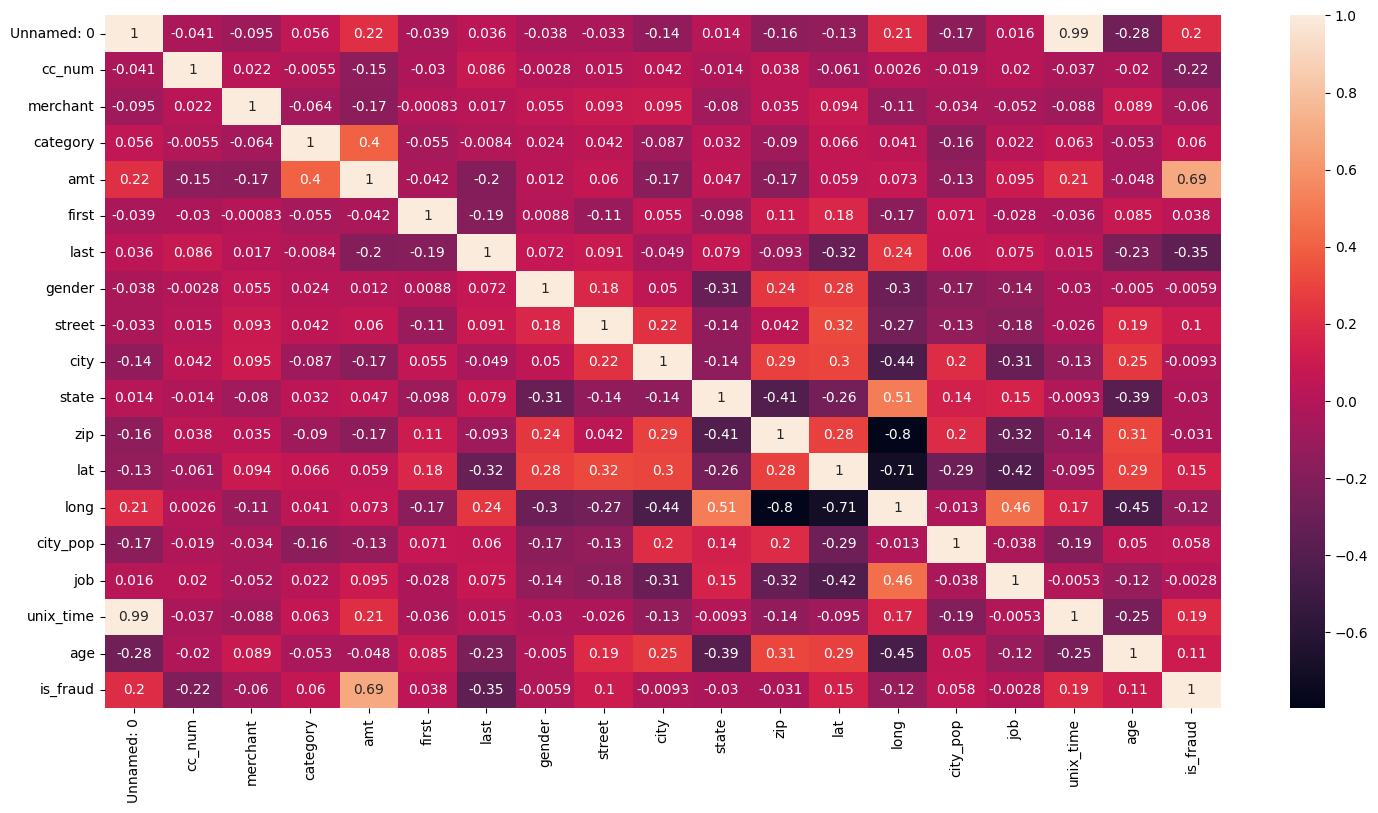

In [42]:
fig, ax = plt.subplots(1,1,figsize=(18,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [43]:
data.drop(columns=['cc_num','merchant','street','state','first','last','long','lat','job','unix_time','city_pop'],inplace=True)

In [44]:
data.head()

,Unnamed: 0,category,amt,gender,city,zip,age,is_fraud
0,0,8,4.97,0,493,241,36,0.0
1,1,4,107.23,0,567,893,46,0.0
2,2,0,220.11,1,439,795,62,0.0
3,3,2,45.00,1,81,567,57,0.0
4,4,9,41.96,1,203,211,38,0.0


In [45]:
x = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print("Training sample size :",X_train.shape)
print("Test sample size :",X_test.shape)

Training sample size : (24788, 7)
Test sample size : (6198, 7)


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
print("Training set accuracy :",model_lr.score(X_train,y_train))
print("Test set accuracy :",model_lr.score(X_test,y_test))

Training set accuracy : 0.8947071163466194
Test set accuracy : 0.888351080993869


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


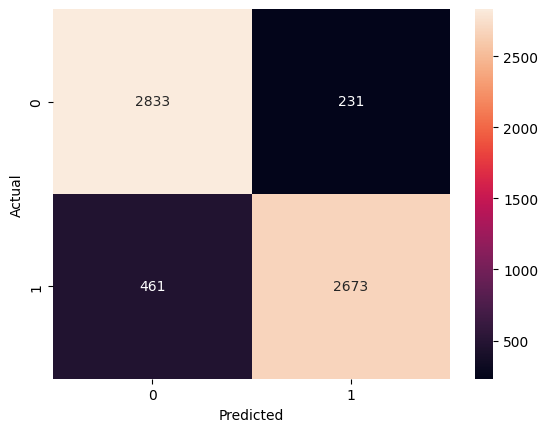

In [60]:
y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [61]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      3064
         1.0       0.92      0.85      0.89      3134

    accuracy                           0.89      6198
   macro avg       0.89      0.89      0.89      6198
weighted avg       0.89      0.89      0.89      6198



In [63]:
model_DTC = DecisionTreeClassifier(max_depth=20)
model_DTC.fit(X_train,y_train)
print('Training set Score :',model_DTC.score(X_train,y_train))
print('Test set Score :',model_DTC.score(X_test,y_test))

Training set Score : 0.9997982894949169
Test set Score : 0.9972571797353985


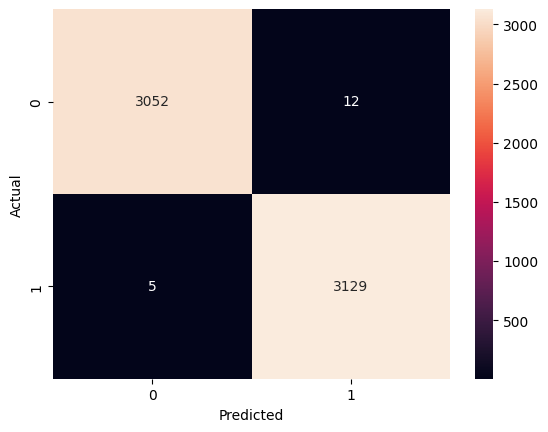

In [64]:
y_pred = model_DTC.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3064
         1.0       1.00      1.00      1.00      3134

    accuracy                           1.00      6198
   macro avg       1.00      1.00      1.00      6198
weighted avg       1.00      1.00      1.00      6198



In [66]:
model_RFC = RandomForestClassifier(max_depth=20)
model_RFC.fit(X_train,y_train)
print('Training set Score :',model_RFC.score(X_train,y_train))
print('Test set Score :',model_RFC.score(X_test,y_test))

Training set Score : 1.0
Test set Score : 0.9993546305259762


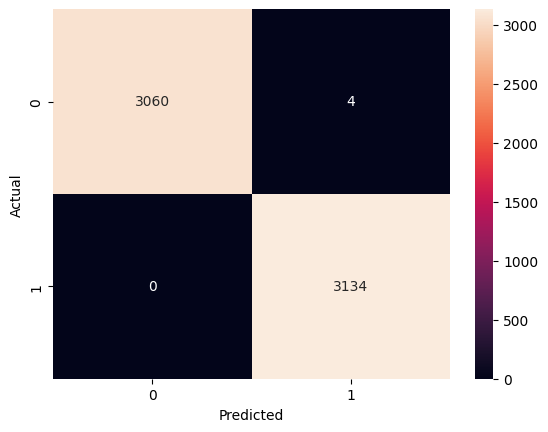

In [67]:
y_pred = model_RFC.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3064
         1.0       1.00      1.00      1.00      3134

    accuracy                           1.00      6198
   macro avg       1.00      1.00      1.00      6198
weighted avg       1.00      1.00      1.00      6198

